#### Data Science and Business Analytics Internship GRIPFEB'21
#### Task 1- Prediction using Supervised Machine Learning .
#### Problem statement - what will be the predicted score if student studies for 9.25 hrs/day?

In [81]:
#Importing all the libraries that are required to solve the problem:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [37]:
#importing our data set:
dataset= 'http://bit.ly/w-data'
df=pd.read_csv(dataset)

In [38]:
#Reading our dataset:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [39]:
#To know the summary of our dataset we use:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [40]:
#To read only first five rows of our dataset:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [41]:
#for calculating statistical data :
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualizing our data through Scatter Plot.

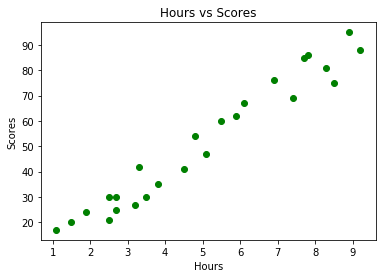

In [98]:
x=df['Hours']
y=df['Scores']
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(x,y,color='green')
plt.show()

In [43]:
#converting our dataframe into array
x=np.array(df['Hours']).reshape(-1,1)
y=np.array(df['Scores']).reshape(-1,1)

### Splitting our data into: training dataset and test dataset

In [44]:
#splitting our dataset using train_test_split()
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
#Reading values in Training dataset:
print('The values in X_train are: ',X_train)
print('The values in y_train are: ',y_train)

The values in X_train are:  [[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
The values in y_train are:  [[35]
 [24]
 [86]
 [76]
 [17]
 [47]
 [85]
 [42]
 [81]
 [88]
 [67]
 [30]
 [25]
 [60]
 [30]
 [75]
 [21]
 [54]
 [95]
 [41]]


### Creating our Linear Regression model for prediction:

In [46]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#knowing the values of our slope and intercept acc to Best-Fit-Line equation.
intercept=lm.intercept_ 
intercept

array([2.01816004])

In [48]:
#knowing the value of slope that is coef:
coef=lm.coef_
coef=coef.reshape(-1)
coef

array([9.91065648])

In [71]:
#defining a function for getting the best-fit-line equation.
def myfunc(slope, intercept):
    axes= plt.gca()
    x_vals=np.array(axes.get_xlim())
    y_vals=intercept+slope*x_vals
    plt.plot(x_vals,y_vals,'--',color='black')

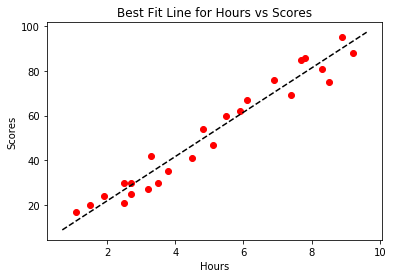

In [99]:
#Plotting our Best Fit line for the model:
plt.scatter(x,y,color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Best Fit Line for Hours vs Scores')
myfunc(coef,intercept)

In [51]:
#Predicting the value based on X_test
y_pred=lm.predict(X_test)

In [52]:
#reading the predicted values
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [80]:
#Creating a DataFrame to show Actual VS Predicted.
y_test1=list(y_test)
y_pred1=list(y_pred)
df1=pd.DataFrame({'Actual':y_test1,'Predicted':y_pred1})
df1

,Actual,Predicted
0,[20],[16.884144762398037]
1,[27],[33.73226077948984]
2,[69],[75.35701799818723]
3,[30],[26.794801243040276]
4,[62],[60.491033277223885]


### Evaluating the Accuracy of our Model:

In [84]:
#Evaluating the accuracy/performance of our model:
metrics.r2_score(y_test,y_pred)

0.9454906892105356

###### Since our r2 score is 94% it indicates that our model is good.

### Prediction of Errors through metrics:

In [85]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error :  4.183859899002975
Mean Squared Error :  21.5987693072174
Root Mean Squared Error :  4.6474476121003665


### Predicting the score if, the student studies for 9.25hrs/day

In [95]:
pred_score=lm.predict([[9.25]])
pred_score

array([[93.69173249]])

In [96]:
print('The predicted scores if the students studies for 9.25hrs/day is: ',pred_score)

The predicted scores if the students studies for 9.25hrs/day is:  [[93.69173249]]


#### The predicted score of a student if he studies for 9.25hrs/day is 93.6%

#### Completed Task-1
#### Thankyou